## Import libraries

In [ ]:
import math
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data processing

In [ ]:
# Read file and return line
def readfile(fn):
  with open(fn, 'r', encoding='utf-8') as f:
    lines = [line.strip() for line in f.readlines()]
  return lines


# Read word from file
def readword(fn):
  with open(fn, 'r', encoding='ISO-8859-1') as f:
    lines = [line.strip() for line in f.readlines()]
  return lines

In [ ]:
# Remove new line characters from a list of strings
def remove_newline_chars(lines):
    return [line[:-1] for line in lines]

# Convert a list of strings to lowercase
def convert_to_lowercase(lines):
    return [line.lower() for line in lines]

In [ ]:
# Tokenize a list of strings using NLTK
def tokenize_reviews(lines):
    return [word_tokenize(line) for line in lines]

In [ ]:
# Tokenize and remove stop words
def preprocess_and_tokenize(reviews):
    stop_words = set(stopwords.words('english'))
    tokenized_reviews = []
    for review in reviews:
        tokens = word_tokenize(review.lower())
        # Remove stop words
        tokens_without_stopwords = [word for word in tokens if word.lower() not in stop_words]
        tokenized_reviews.append(tokens_without_stopwords)
    return tokenized_reviews

In [ ]:
# Read your positive and negative reviews
pos_reviews = readfile('positive-reviews.txt')
neg_reviews = readfile('negative-reviews.txt')

# Read positive and negative words
pos_words = readword('positive-words.txt')
neg_words = readword('negative-words.txt')

In [ ]:
# Clean and preprocess positive and negative reviews
pos_reviews = remove_newline_chars(pos_reviews)
neg_reviews = remove_newline_chars(neg_reviews)
pos_reviews = convert_to_lowercase(pos_reviews)
neg_reviews = convert_to_lowercase(neg_reviews)

In [ ]:
# Tokenize positive and negative reviews
pos_tokenized = tokenize_reviews(pos_reviews)
neg_tokenized = tokenize_reviews(neg_reviews)

In [ ]:
# Tokenize and remove stop words
pos_tokenized_no_stopwords = preprocess_and_tokenize(pos_reviews)
neg_tokenized_no_stopwords = preprocess_and_tokenize(neg_reviews)

# Print the first two tokenized reviews
print("Tokenized Positive Reviews:")
print(pos_tokenized[:2])
print("\nTokenized Negative Reviews:")
print(neg_tokenized[:2])

Tokenized Positive Reviews:
[['easy', 'to', 'use', ',', 'economical'], ['digital', 'is', 'where', 'it', "'s", 'at', '...', 'down', 'with', 'developing', 'film']]

Tokenized Negative Reviews:
[['east', 'batteries', '!', 'on-off', 'switch', 'too', 'easy', 'to', 'maneuver'], ['eats', '...', 'no', ',', 'gulps', 'batterie']]


In [ ]:
#Perform feature extraction
def extract_features(tokenized_reviews, positive_words, negative_words):
  features = []

  for review in tokenized_reviews:
    count_positive = sum(1 for word in review if word in positive_words)
    count_negative = sum(1 for word in review if word in negative_words)
    contain_no = 1 if 'no' in review else 0
    pronouns = ['i', 'me', 'my', 'you', 'your']
    count_pronoun = sum(1 for word in review if word in pronouns)
    contains_exclamation = 1 if '!' in review else 0
    review_length = len(review)
    log_review_length = math.log(review_length) if review_length > 1 else review_length

    feature_vector = [
      count_positive,
      count_negative,
      contain_no,
      count_pronoun,
      contains_exclamation,
      log_review_length
    ]

    features.append(feature_vector)

  return features

# Extract features for positive and negative reviews
positive_reviews_features = extract_features(pos_tokenized_no_stopwords, pos_words, neg_words)
negative_reviews_features = extract_features(neg_tokenized_no_stopwords, pos_words, neg_words)

# Print the features for a positive and a negative review
print("Positive Review Features:")
print(positive_reviews_features[:2])

print("\nNegative Review Features:")
print(negative_reviews_features[:2])

Positive Review Features:
[[2, 0, 0, 0, 0, 1.3862943611198906], [0, 0, 0, 0, 0, 1.6094379124341003]]

Negative Review Features:
[[1, 0, 0, 0, 1, 1.9459101490553132], [0, 0, 0, 0, 0, 1.6094379124341003]]


In [ ]:
# Combine features and labels for positive reviews
positive_data = [(features, 1) for features in positive_reviews_features]

# Combine features and labels for negative reviews
negative_data = [(features, 0) for features in negative_reviews_features]

# Combine positive and negative data
all_data = positive_data + negative_data

# Separate features and labels
features = [data[0] for data in all_data]
labels = [data[1] for data in all_data]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# Train a logistic regression model
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy_logistic = model_logistic.score(X_test, y_test)
print(f"Logistic Accuracy: {accuracy_logistic:.2%}")

Logistic Accuracy: 81.51%


In [ ]:
# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_NB = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy_NB:.2%}")

# Display additional evaluation metrics (optional)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 81.47%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      4607
           1       0.87      0.73      0.80      4567

    accuracy                           0.81      9174
   macro avg       0.82      0.81      0.81      9174
weighted avg       0.82      0.81      0.81      9174



In [ ]:
# Create a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)
# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy_knn:.2%}")

KNN Accuracy: 74.25%


In [ ]:
# Create a random forest classifier
model_random_forest = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
model_random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_random_forest.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy_rf:.2%}')

# Display the confusion matrix
confusion_matrix(y_test, y_pred)


Random Forest Accuracy: 81.92%


array([[4086,  521],
       [1138, 3429]])

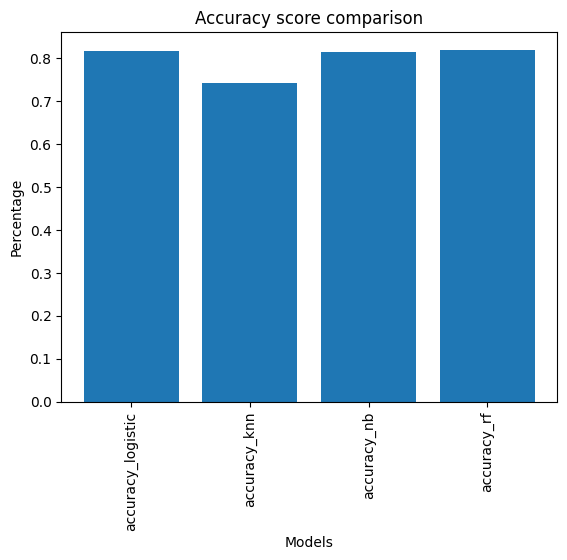

In [ ]:
import matplotlib.pyplot as plt # for data visualization
# Create a bar chart
plt.bar(range(4), [accuracy_logistic, accuracy_knn, accuracy_NB, accuracy_rf], tick_label=['accuracy_logistic', 'accuracy_knn', 'accuracy_nb', 'accuracy_rf'])
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('Percentage')
plt.title('Accuracy score comparison')
plt.show()